## Objective 
In this notebook we will explore the world of mushrooms using tools of Exploratory Data Analysis, will try to build a predictive modeling tool and in the end, we will make a guideline that can aid in distinguishing edible from poisonous variety.  

### Importing modules
We begin with importing the necessary modules.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('mushrooms.csv')

Next, using the `head`, `shape`, `column` and `info` methods, I found that there are 8124 samples and 23 features. These categorical features mostly include the various aspects of a mushroom's morphology/physical appearance. Moreover, there is no missing data!

In [2]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Further, probing shows that except 'veil-type', all other features have atleast 2 or more categories.

In [6]:
lst=[]
for col in data.columns:
    lst.append(data[col].nunique())
x=dict(zip(data.columns,lst) )
x

{'bruises': 2,
 'cap-color': 10,
 'cap-shape': 6,
 'cap-surface': 4,
 'class': 2,
 'gill-attachment': 2,
 'gill-color': 12,
 'gill-size': 2,
 'gill-spacing': 2,
 'habitat': 7,
 'odor': 9,
 'population': 6,
 'ring-number': 3,
 'ring-type': 5,
 'spore-print-color': 9,
 'stalk-color-above-ring': 9,
 'stalk-color-below-ring': 9,
 'stalk-root': 5,
 'stalk-shape': 2,
 'stalk-surface-above-ring': 4,
 'stalk-surface-below-ring': 4,
 'veil-color': 4,
 'veil-type': 1}

Next, checking the target variable, 'class'  it is evident hat there are data for 4208 edible (e) mushrooms and for 3916 poisonous (p) mushrooms.

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Text(0.5, 1.0, 'Number of p and e mushrooms')

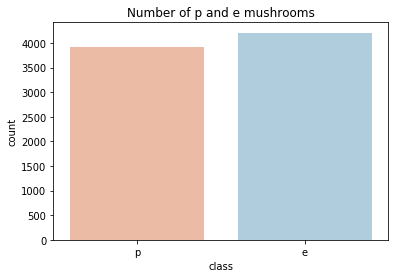

In [8]:
sns.countplot(x='class', palette='RdBu', data=data)
plt.title('Number of p and e mushrooms')

For further data analysis, I made 2 dataframes for poisonous and edible mushrooms.

In [9]:
p_data=data.loc[data['class']=='p']
e_data=data.loc[data['class']=='e']
e_data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


### Plots
To get a better understanding of the characteristics of edible and poisonous mushrooms and which characters are distinct, I made plots for each feature. Instead of plugging the numbers of mushrooms directly in the characteres/categories of each feature/column, I calculated first the percentage of edible and poisonous mushrooms falling in the categories in each feature or column. This was done because we have unequal amount of data for edible and poisonous mushrooms (4208 edible (e) mushrooms and 3916 poisonous (p) ). For a better understanding, I have kept tables showing the percentage distribution of edible and poisonous mushrooms in different categories here.

Some of the features that show vast differences between the two classes are - Odor, Bruises, Stalk surface above the ring, Spore print color. Within the features there are categories where either of the classes having complete dominance such as in the case of buff gill color shown only by poisonous mushrooms.

                perc           
class              e          p
cap-shape                      
b           9.600760   1.225741
c           0.000000   0.102145
f          37.927757  39.734423
k           5.418251  15.321757
s           0.760456   0.000000
x          46.292776  43.615935
                  perc           
class                e          p
cap-surface                      
f            37.072243  19.407559
g             0.000000   0.102145
s            27.186312  36.057201
y            35.741445  44.433095
                perc           
class              e          p
cap-color                      
b           1.140684   3.064351
c           0.760456   0.306435
e          14.828897  22.369765
g          24.524715  20.633299
n          30.038023  26.046987
p           1.330798   2.247191
r           0.380228   0.000000
u           0.380228   0.000000
w          17.110266   8.171604
y           9.505703  17.160368
             perc           
class           e          p


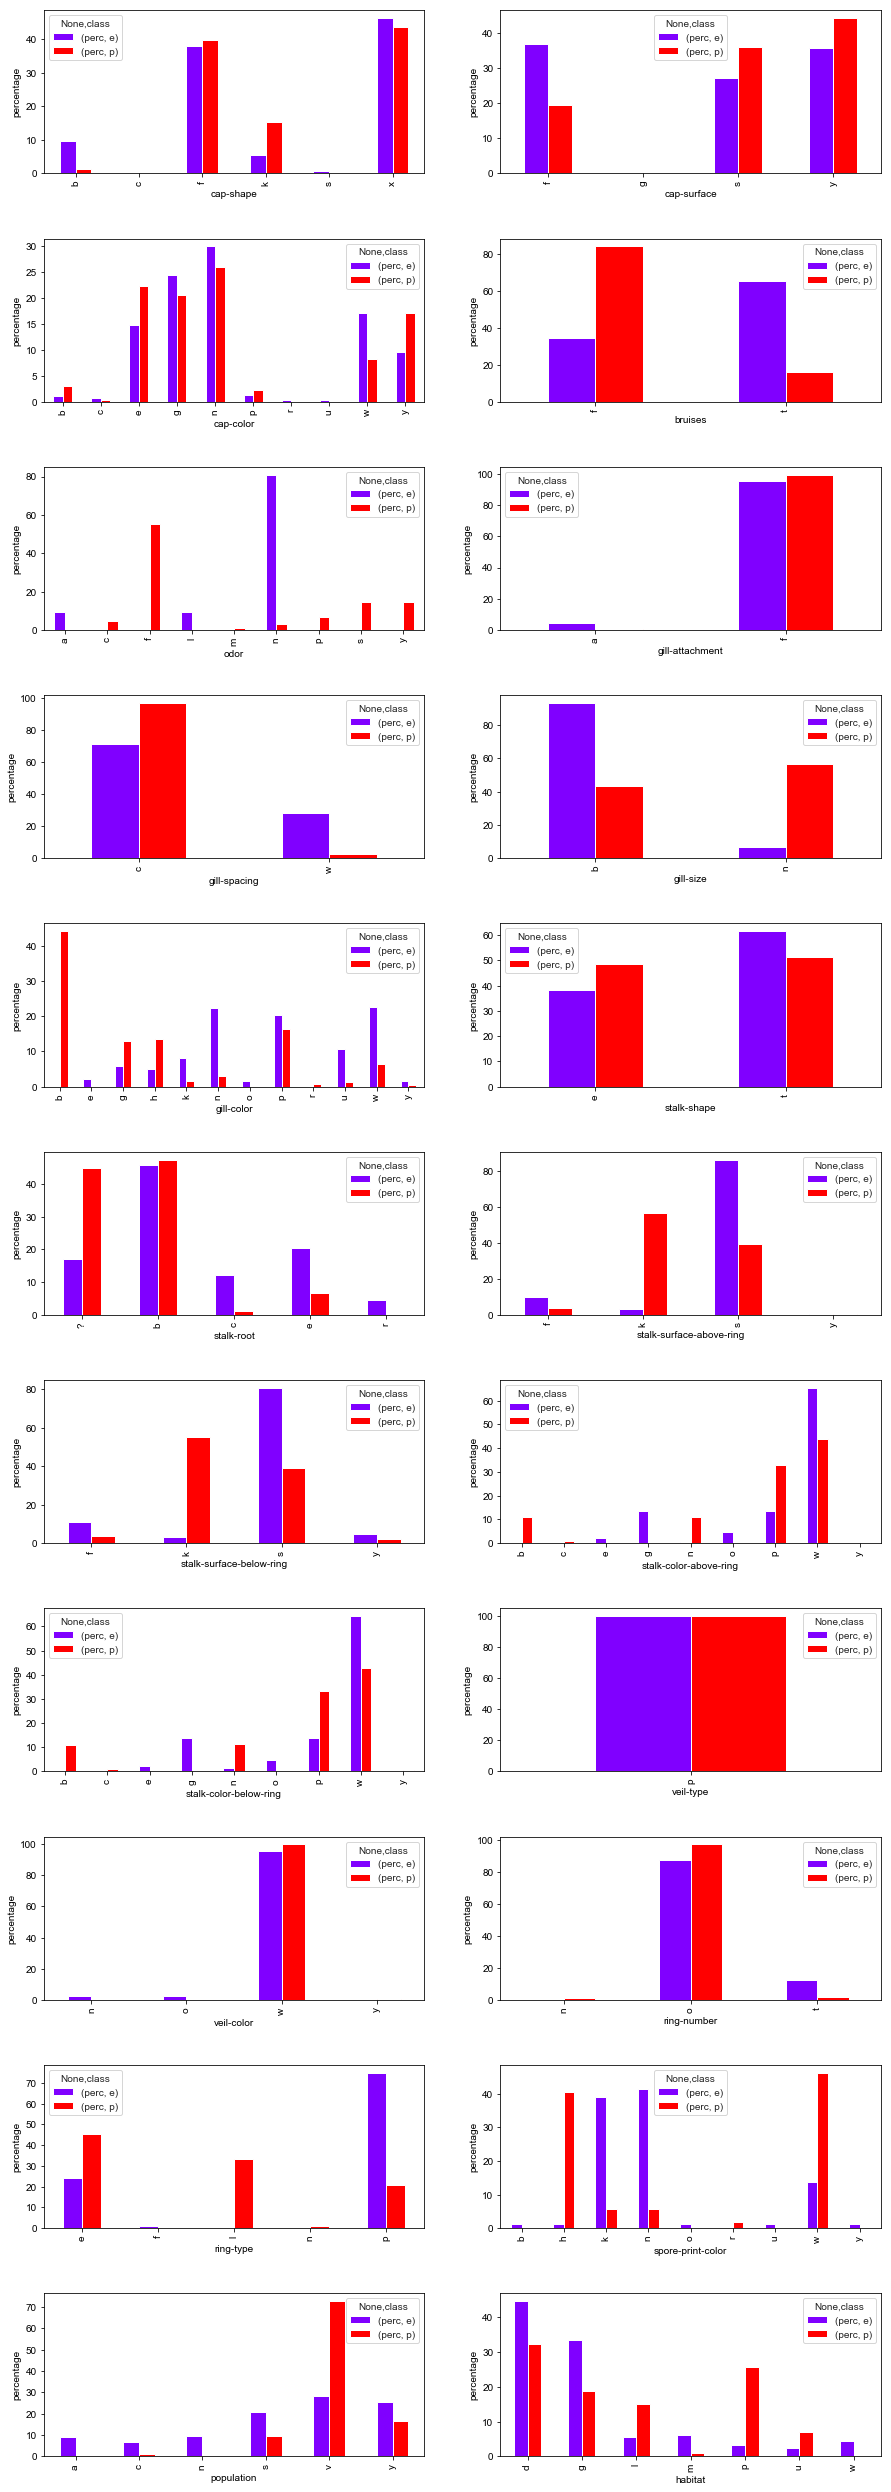

In [10]:
lst=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
fig, axes = plt.subplots(11, 2, figsize=(15,45))
sns.set_style('white')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
n=0
for i in lst:
    data_p_1=p_data.groupby(['class',i]).agg({i:'count'})
    data_p_1.columns=['number']
    data_p_1['perc']= (data_p_1['number']*100)/3916
    data_e_1=e_data.groupby(['class',i]).agg({i:'count'})
    data_e_1.columns=['number']
    data_e_1['perc']= (data_e_1['number']*100)/4208
    data_new_i=pd.concat([data_p_1,data_e_1],axis=0)
    data_new_i.drop(['number'],axis=1,inplace=True)
    data_new1=data_new_i.unstack(level=0).fillna(0)
    print(data_new1)
    data_new1.plot(kind='bar',cmap='rainbow', ax=axes[n//2, n%2])
    axes[n//2, n%2].set_ylabel('percentage')
    n+=1

### Building models
Before building our machine learning algorithms, I dropped 'veil-type' as this feature has only one category. This is followed by label encoding and one hot encoding to convert the categorical data into a machine learning algorithm-readable form. For our target variables - 0 corresponds to edible mushrooms and 1 to poisonous mushrooms.

In [11]:
data=data.drop(['veil-type'],axis=1)
data.shape

(8124, 22)

In [12]:
encoder=LabelEncoder()
lst=[]
for col in data.columns:
    if data[col].nunique()<=2:
        lst.append(str(col))
print(lst)
for i in lst:
    encoder.fit(data[i].drop_duplicates())
    data[i]=encoder.transform(data[i])

print(data.head(2))
#p=1
#e=0

['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape']
   class cap-shape cap-surface cap-color  bruises odor  gill-attachment  \
0      1         x           s         n        1    p                1   
1      0         x           s         y        1    a                1   

   gill-spacing  gill-size gill-color   ...    stalk-surface-above-ring  \
0             0          1          k   ...                           s   
1             0          0          k   ...                           s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   

  veil-color ring-number ring-type spore-print-color population habitat  
0          w           o         p                 k          s       u  
1          w           o         p                 n          n       g  

[2 rows x 22

In [13]:
data=pd.get_dummies(data)
data.shape

(8124, 112)

Next, I obtained the train and test sets.

In [14]:
x=data.drop(['class'],axis=1)
X=x.values
y=data['class']
X.shape

(8124, 111)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=21)

Principal Component Analysis (PCA) was performed for dimensionality reduction.

(0, 115)

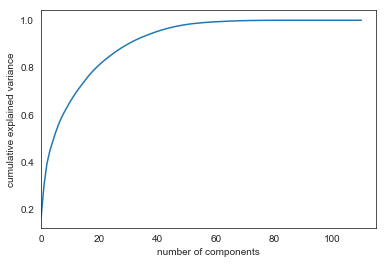

In [16]:
pca=PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,115,5)

In [17]:
pca=PCA(n_components=40)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_train_pca.shape

(5686, 40)

I started with a simple classifier- Logistic Regression. This gave a high accuracy of 99%  and over 98% scores for both recall and precision.

In [18]:
logreg=LogisticRegression(random_state=1)
score = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

Accuracy: 99.03%
Precision : 99.34%
Recall score: 98.65%


After hyperparameteres tuning, I obtained the best parameteres for logistic regression- penalty =l1 and C=100. This gave a 100% accuracy score. 

In [19]:
logreg=LogisticRegression(random_state=1)
param_grid = {'penalty': ['l1','l2'], 'C': [10,100,1000]}
logreg_cv = GridSearchCV(estimator = logreg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
logreg_cv.fit( X_train_pca, y_train)
print(logreg_cv.best_params_)
score=logreg_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'penalty': 'l1', 'C': 100}
Accuracy: 100.00%


Plugging the hyperparameters in logistic regression, gave 100% accuracy, precision and recall score for the test set. 

Accuracy: 100.00%
Precision : 100.00%
Recall score: 100.00%


Text(34.0, 0.5, 'True label')

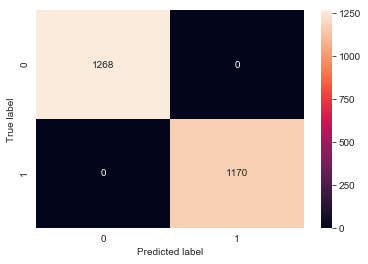

In [20]:
logreg2=LogisticRegression(random_state=1,penalty= 'l1',C=100)
logreg2.fit(X_train_pca, y_train)
y_pred=logreg2.predict(X_test_pca)
ascore=accuracy_score(y_test,y_pred)
pscore=precision_score(y_test,y_pred)
rscore=recall_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print("Accuracy: %s" % '{:.2%}'.format(ascore))
print ('Precision : %s' %'{:.2%}' .format(pscore))
print ('Recall score: %s' % '{:.2%}'.format(rscore))

sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

Excited with the 100% accuracy obtained using LogisticRegression and a bit skeptical, I tried Random Forest Classifier. Another reason for using RandomForest classfier was to obtain important features that can aid in distinguishing edible and poisonous mushrooms. I used the data that was obtained before PCA. RandomForest classfier also gave a 100% accuracy score in that case. (Accuracy was 99.86% in data obtained after PCA)

In [21]:
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train, y_train, scoring='accuracy'))
p_score_rf = np.mean(cross_val_score(rf,  X_train, y_train, scoring='precision'))
r_score_rf = np.mean(cross_val_score(rf,  X_train, y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))
print ('Precision RandomForest:: %s' %'{:.2%}' .format(p_score_rf))
print ('Recall score RandomForest:: %s' % '{:.2%}'.format(r_score_rf))

Accuracy for RandomForest: 100.00%
Precision RandomForest:: 100.00%
Recall score RandomForest:: 100.00%


The same results were echoed in the test set.

Accuracy: 100.00%
Precision : 100.00%
Recall score: 100.00%
Confusion matrix: 
[[1268    0]
 [   0 1170]]


Text(34.0, 0.5, 'True label')

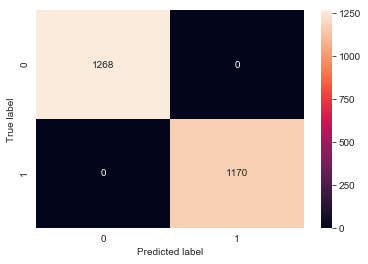

In [22]:
rf=RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
ascore=accuracy_score(y_test,y_pred)
pscore=precision_score(y_test,y_pred)
rscore=recall_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print("Accuracy: %s" % '{:.2%}'.format(ascore))
print ('Precision : %s' %'{:.2%}' .format(pscore))
print ('Recall score: %s' % '{:.2%}'.format(rscore))
print('Confusion matrix: ')
print(matrix)

sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

RandomForest Classfier was then used to get the important features and their degree of  importance.

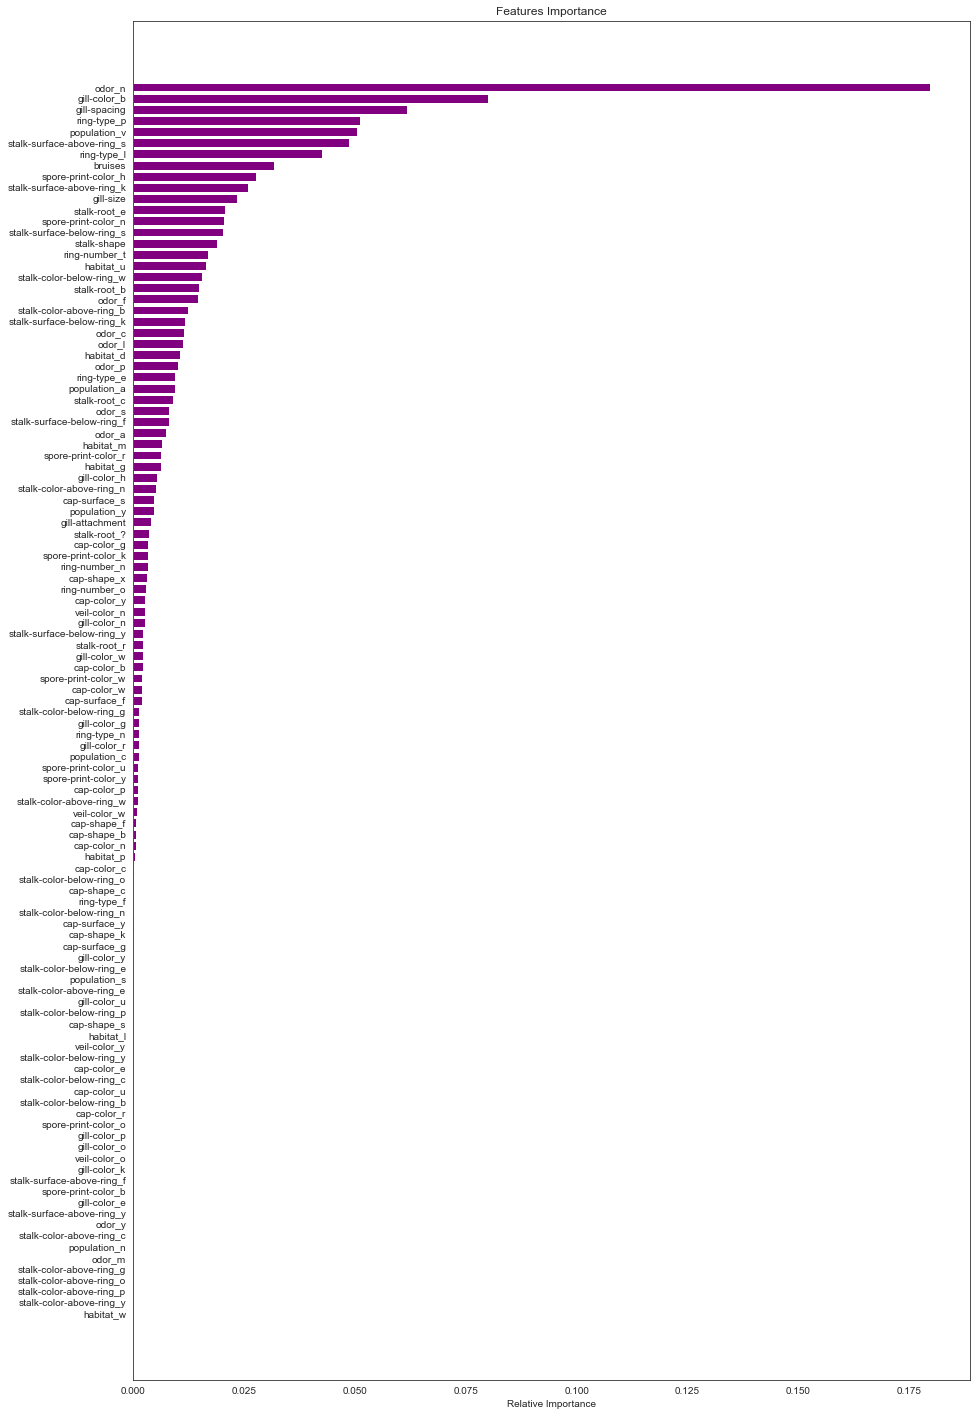

In [23]:
fig, ax=plt.subplots(figsize=(15,25))
features = x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

The top 10 features for distinguishing edible from poisonous mushrooms are as follows:
1. odor_n= This correspond to odor-none i.e. odorless, which is a characteristic shown by over 81% of the edible mushrooms compared to only 3% poisonous mushrooms. Odor in general is one of the features that shows huge difference between edible and posionous mushrooms. This was already quite evident from the EDA performed above.
2. gill_color_b= This corresponds to buff coloured gill shown only by poisonous mushrooms. It is a characteristic shown by 44% of the poisonous variety.
3. gill spacing= Closed spacing is shown by 97% of poisonous mushrooms and 71% edible ones. The difference is more evident when 28% of edible ones show crowded gill spacing compared to only 3% of poisonous ones.
4. ring type p= Pendant type ring is shown by over 75% edible mushrooms compared to 21% poisonous ones.
5. population_v= 'several' population, with 21% edible mushrooms compared to 9% poisonous ones.
6. stalk surface above ring s= 'Smooth' stalk surface for nearly 86% edible mushrooms compared to 40% poisonous ones.
7. ring type i= If the ring type is large, then the mushroom is definitely poisonous. 
8. bruises= Majority of poisonous mushroom have no bruises while majority of edible ones have.
9. spore print color h- 40% of poisonous mushrooms show chocolate coloured spores, while only 1% of edible ones have chocolate colored spores.
10. stalk surface above ring k=Majority of poisonous mushrooms have silky stalk surface above ring.

###  Conclusion
So, a **general guideline** (obtained after EDA and from RandomForestClassfier's features importantance) while shrooming is -
A mushroom is **poisononous**, if it has-
1.  an odor (such as creosote ,fishy, foul, pungent, spicy , a character of 95% poisonous mushrooms), or 
2. has a large ring (a character shown only by poisonous mushrooms),  or 
3. a combination of any of the above and lower mentioned points-
i).   buff colored gills, 
ii).  closed gill spacing, 
iii). no bruises, 
iv). chocolate colored spore print (or even white colored), 
v). has a silky stalk surface  above the ring
